<a href="https://colab.research.google.com/github/imsewonyyy/AI-/blob/main/%EB%B6%84%EB%A5%98%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8%EB%A7%81_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%83%90%EC%83%89_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%99%84%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **기존 데이터셋** Phase 1-프로젝트 준비 및 탐색
# 신규노선 항공운임예측

# **1. 프로젝트 정의 및 목표 설정**

본 프로젝트의 목표는 항공 운임(Airfare)을 예측하는 회귀 모델을 개발하는 것이다. 사용자는 항공편의 출발지, 도착지, 경유 여부, 항공사 등의 정보를 기반으로 해당 항공권의 가격을 예측하고자 한다. 이는 가격 책정 전략 수립, 경쟁사 분석, 고객 맞춤형 요금 제안 등에 활용될 수 있다.



● 데이터 정의 (Data Definition)

본 프로젝트에서는 제공된 Airfares_simple_garbled.csv 데이터를 사용한다. 해당 데이터는 항공 운임에 영향을 줄 수 있는 다양한 변수(출발지, 도착지, 항공사, 여행일, 경유 여부 등)와 실제 운임 정보를 포함하고 있으며, 데이터 출처는 항공권 가격 조사에서 수집된 것으로 추정된다. 다만, 원본 데이터에는 일부 오류 혹은 비정상적인 값이 포함되어 있어 추가적인 정제 작업이 필요하다.



● 성공 지표 설정 (Success Metrics)

예측 모델의 성능 평가는 Root Mean Squared Error (RMSE) 와 Mean Absolute Error (MAE) 를 기준으로 한다. 다음과 같은 성능 기준을 목표로 설정한다:

RMSE: 40 이하

MAE: 30 이하

이는 항공권 가격 예측의 오차가 실제 비즈니스에 유의미하게 작용할 수 있는 수준을 고려한 수치이다.




● 기대 효과 및 제약 조건 (Expected Impact & Constraints)

기대 효과:

-고객에게 보다 정확한 예상 항공권 가격을 제공하여 구매 결정 지원

-항공사 또는 여행 플랫폼에서 가격 예측 기반 맞춤 추천 가능

# **2. 데이터 수집 및 로드**

In [ ]:
# 1. 원본 데이터셋 로드
from google.colab import files
uploaded = files.upload()


In [ ]:
# 1. 수정된 데이터셋 로드
from google.colab import files
uploaded = files.upload()


Saving Airfares_simple_garbled.csv to Airfares_simple_garbled.csv


In [ ]:
# 2. pandas 라이브러리 불러오기
import pandas as pd

# 3. 원본 데이터셋
df = pd.read_csv('Airfares.csv')



# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [ ]:
# 데이터프레임 기본 정보 출력
print("✅ 데이터 기본 정보:")
print(df.info())
print("\n✅ 데이터 상위 5행:")
print(df.head())
print("\n✅ 기술통계 요약:")
print(df.describe(include='all'))


로드된 데이터는 총 638개의 행과 18개의 열로 구성되어 있으며, 각 열은 출발지/도착지 정보, 인구 및 소득, 항공편 특성, 거리, 여객 수, 요금 등의 변수로 이루어져 있다. df.info()와 df.describe() 함수를 통해 데이터 타입과 결측치 유무, 변수별 기초 통계값을 확인하였다. 전체적으로 결측치는 존재하지 않으며, 수치형 및 범주형 변수가 혼합된 구조를 가지고 있음을 파악하였다.

In [ ]:
# 수치형 데이터만 추출하여 요약 통계 확인
df.describe()


,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,638.000000,638.000000,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000
mean,1.202335,2.753918,4442.141129,27759.860502,27663.727273,4.557004e+06,3.194503e+06,975.653605,12782.214734,160.876677
std,0.203821,0.760448,1724.267051,3596.207837,4611.325018,3.010985e+06,2.735604e+06,646.242403,13202.228860,76.022436
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,3.000000,3090.137500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,455.000000,5328.500000,106.290000
50%,1.150000,3.000000,4208.185000,28637.000000,26409.000000,3.532657e+06,2.195215e+06,850.000000,7792.000000,144.600000
75%,1.297500,3.000000,5480.575000,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1306.250000,14090.500000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


총 10개의 수치형 변수에 대해 요약 통계를 확인하였다.

FARE의 평균은 160.88, 중앙값은 144.60으로 **우측에 긴 꼬리 분포(Positive Skew)**가 있음.

표준편차는 76.02로, 분산이 크고 다양한 요금대가 존재함.

PAX(여객 수)의 최대값은 73,892명으로, 다른 평균 값에 비해 매우 높아 이상치 존재 가능성을 시사함.

In [ ]:
# 범주형 변수 고유값과 빈도수 확인
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n📌 {col} 고유값 및 빈도수:")
    print(df[col].value_counts())



📌 S_CODE 고유값 및 빈도수:
S_CODE
*      454
ORD     45
MDW     45
EWR     30
JFK     29
LGA     29
IAD      3
DCA      3
Name: count, dtype: int64

📌 S_CITY 고유값 및 빈도수:
S_CITY
Chicago             IL    90
New York/Newark     NY    88
Atlanta             GA    41
Dallas/Fort Worth   TX    36
Los Angeles         CA    33
Boston              MA    31
Las Vegas           NV    26
Detroit             MI    22
Denver              CO    22
Houston             TX    20
Orlando             FL    15
Phoenix             AZ    15
Seattle/Tacoma      WA    12
Minneapolis/St Paul MN    12
Miami               FL    11
Fort Lauderdale     FL    11
Kansas City         MO    11
Austin              TX    10
Cleveland           OH    10
Columbus            OH    10
San Diego           CA     9
Albuquerque         NM     9
San Francisco       CA     8
Burbank             CA     7
New Orleans         LA     7
Cincinnati          OH     6
Philadelphia/Camden PA     6
Oakland             CA     6
Washington        

VACATION: No가 468건으로 대부분, Yes는 170건으로 소수

SW: No가 444건, Yes가 194건

S_CITY, E_CITY: 출발지는 51개 도시, 도착지는 68개 도시로 다양한 항공편 조합을 가짐

SLOT, GATE: Free, Controlled로 나뉘며, Free가 각각 456건, 514건으로 많음

In [ ]:
# 결측치 개수 및 비율 확인
missing = df.isnull().sum()
missing_ratio = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Ratio (%)': missing_ratio})
print(missing_df)


          Missing Count  Missing Ratio (%)
S_CODE                0                0.0
S_CITY                0                0.0
E_CODE                0                0.0
E_CITY                0                0.0
COUPON                0                0.0
NEW                   0                0.0
VACATION              0                0.0
SW                    0                0.0
HI                    0                0.0
S_INCOME              0                0.0
E_INCOME              0                0.0
S_POP                 0                0.0
E_POP                 0                0.0
SLOT                  0                0.0
GATE                  0                0.0
DISTANCE              0                0.0
PAX                   0                0.0
FARE                  0                0.0


모든 변수에서 결측치는 0건이며, Missing Ratio(%) = 0.0

추가적인 결측치 처리나 보간은 불필요하며, 데이터 품질이 우수함

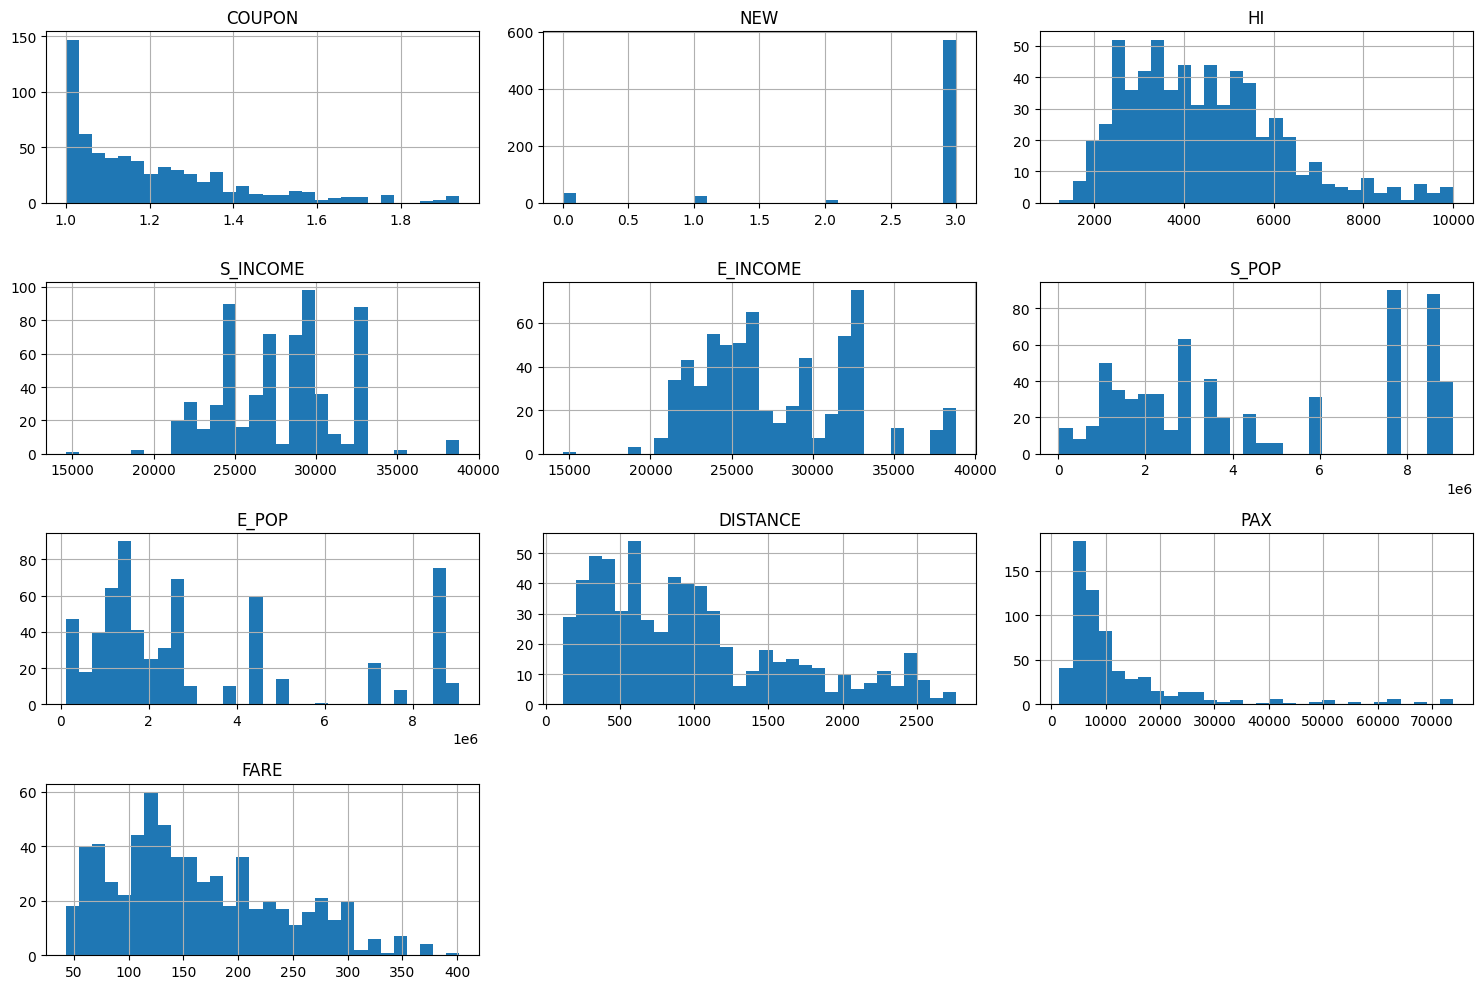

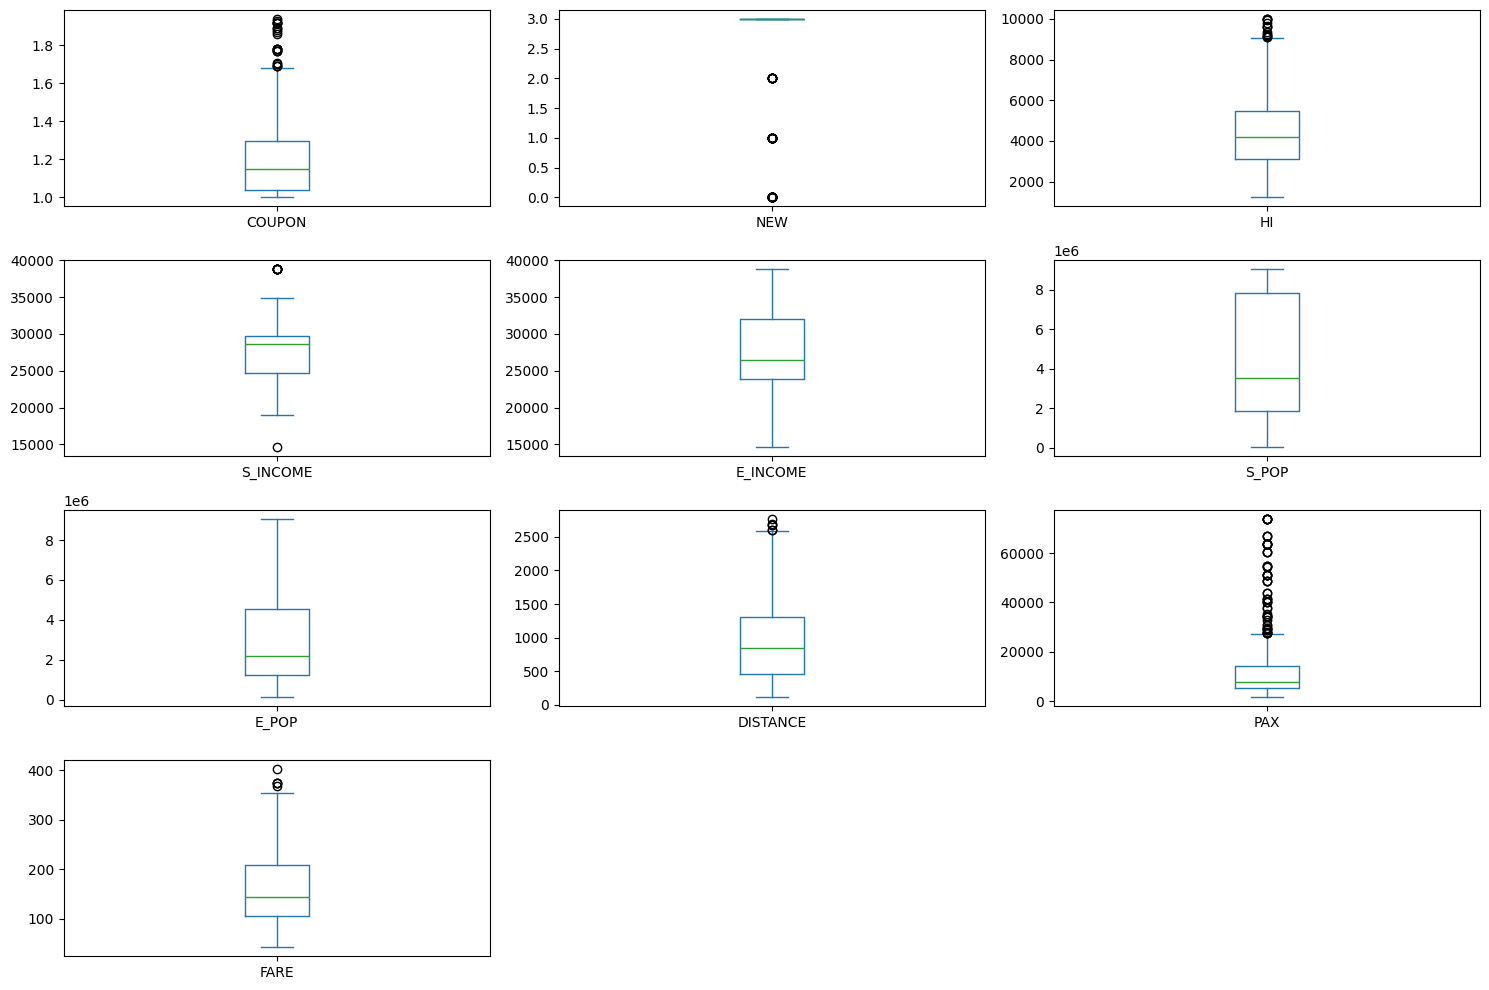

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# 박스플롯
df.plot(kind='box', subplots=True, layout=(4, 3), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()


FARE, HI, PAX 등 일부 변수에서 길게 뻗은 꼬리와 이상치 점들이 확인됨

특히 PAX는 7만 명을 초과하는 극단값으로, 스케일 조정이나 이상치 제거 필요성 존재

HI는 최대 10,000 이상으로 극단적으로 높은 값이 분포되어 있음

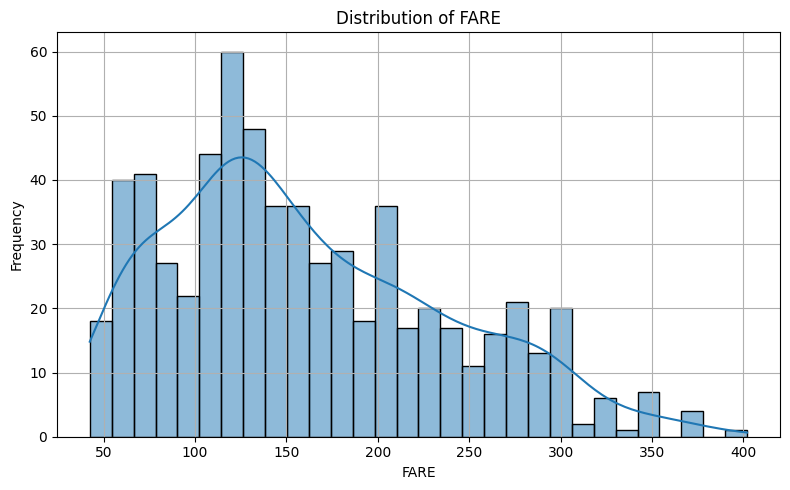

In [ ]:
import seaborn as sns

# 타겟 변수 시각화
plt.figure(figsize=(8, 5))
sns.histplot(df['FARE'], bins=30, kde=True)
plt.title("Distribution of FARE")
plt.xlabel("FARE")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



FARE 분포는 정규분포가 아닌 비대칭 분포이며, 오른쪽 꼬리가 긴 분포를 보임

평균보다 높은 고가 항공 요금이 일부 존재하며, 예측 모델의 정밀도를 위해 로그 변환 등의 정규화가 필요할 수 있음

KDE곡선으로 보면 대부분의 요금은 100~200달러에 집중되어 있음

왜도(Skewness) 결과, AMOUNT, DURATION, AGE 변수는 모두 **양의 왜도(> 0)**를 보였다.

특히 AMOUNT는 왜도가 약 1.95로 오른쪽 꼬리가 길게 분포된 비대칭 형태임을 나타낸다.

이는 고액 대출 사례가 소수 존재함을 의미하며, 로그 변환 등의 정규화가 필요할 수 있다.


첨도(Kurtosis) 결과, AMOUNT는 첨도가 5.7로 **뾰족한 분포(Leptokurtic)**이며,
이는 평균 부근에 많은 값이 몰려 있고, 동시에 극단값(이상치)도 존재함을 의미한다.

반면 AGE, DURATION 등은 첨도가 3에 가까워 정규분포에 비교적 유사한 형태를 보인다.

-----------------------------------------------------------------------------


여기까지가 기존 데이터셋 Phase 1 프로젝트 준비 및 탐색이었고 밑으로는 교수님께서 새로 주신 변경된 데이터셋 Phase 1 입니다!!

# 2. 변경된 데이터셋 Phase 1 -프로젝트 준비 및 탐색



# 신규노선 항공운임예측


# **1. 프로젝트 정의 및 목표 설정**

📌 문제 정의

항공 요금 예측 정확도를 개선하기 위해, 기존 모델에 더해 K-NN, 랜덤 포레스트 등의 추가 모델을 구축하고, 성능 비교를 통해 최적 모델을 탐색한다. 이를 통해 소비자 및 항공사의 합리적 의사결정을 지원할 수 있는 예측 시스템을 고도화한다.



🧾 데이터 정의

사용 데이터: 수정된 Airfares_simple_garbled.csv


전처리 사항:

결측치 존재 여부 확인 및 제거

이상치 탐지 (예: 음수 Amount) 및 처리

문자열 비일관성 (예: 대소문자 혼용, 공백 포함)을 통일

범위 오류 (불가능한 값) 확인 및 수정



🎯 성공 지표

모델 예측 정확도: RMSE (Root Mean Squared Error), MAE (Mean Absolute Error)

모델 성능 비교를 통해 기존 모델 대비 예측력 향상 여부를 검증

과적합 여부를 고려한 일반화 성능 (검증셋 기준)



💡 기대 효과 및 제약 조건

기대 효과:


다양한 모델 비교를 통한 최적 예측모델 도출

데이터 정제에 기반한 신뢰도 높은 분석 결과 확보

항공 요금 정책 또는 소비자 의사결정에 유용한 인사이트 제공



제약 조건:

이상치·결측치 수정 과정에서 정보 손실 발생 가능

고차원 특성을 고려하지 않는 경우 일부 모델에서 성능 저하 가능성

데이터 출처와 구성상, 실제 시장의 복잡성을 완전 반영하기는 어려움

# **2. 데이터 수집 및 로드**

In [ ]:
#수정된 데이터 파일 불러오기
from google. colab import files
uploaded=files.upload()

In [ ]:
#기존 데이터 파일도 다시 불러옴
from google. colab import files
uploaded=files.upload()

In [ ]:
import pandas as pd
# 수정된 데이터셋 변수
df2 = pd.read_csv("Airfares_simple_garbled.csv")

# 원본 데이터셋 변수
df = pd.read_csv('Airfares.csv')

# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [ ]:
# ✅ 수치형 데이터 기술 통계량 확인
df2.describe()


FARE 변수는 평균 약 158, 최소값은 -234, 최대값은 402로 나타났으며, 음수 운임이 존재해 데이터 오류 가능성이 있다.

DISTANCE와 PAX도 최대값 기준으로 이상치가 포함되어 있을 수 있다.

In [ ]:
# ✅ 범주형 변수: 고유값 및 빈도수 확인
categorical_cols = df2.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n📌 {col} (고유값 {df2[col].nunique()}개)")
    print(df2[col].value_counts())


SW, VACATION, SLOT, GATE 등의 변수는 각각 2~3개의 고유값으로 구성되어 있었으며, 일부 변수(VACATION)는 대소문자 불일치로 값이 나뉘어 있는 것으로 보였다.

In [ ]:
# 1. 결측치 찾기
missing_counts = df2.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]

print("=== 1. 결측치 (Missing Values) ===")
print(missing_cols, "\n")


S_INCOME, E_INCOME, DISTANCE, PAX에서 결측치가 확인되었으며, 각각 약 4~5% 정도의 비율을 차지한다.

In [ ]:
# 2. 문자열 공백(Whitespace) 찾기
print("=== 2. 문자열 공백(Whitespace) 문제 ===")
whitespace_issues = {}  # 공백 발생한 값 담을 딕셔너리

for col in df2.select_dtypes(include='object').columns:  # 문자열 컬럼만 골라서
    mask = df2[col].apply(lambda x: isinstance(x, str) and (x != x.strip()))  # 공백이 있는 값 탐지
    if mask.any():  # 공백이 존재한다면
        whitespace_issues[col] = df2.loc[mask, col]
        print(f"\nColumn: {col}")
        print(df2.loc[mask, col])


In [ ]:
# 앞 뒤로 공백있는 문자열 공백값 존재 예시 출력

df['E_CITY'][36]

In [ ]:
# 3. 대소문자 불일치(Case Inconsistency) 찾기
print("\n=== 3. 대소문자 불일치(Case Inconsistency) ===")
case_issues = {}

for col in df2.select_dtypes(include='object').columns:  # 문자열 타입 컬럼만 탐색
    vals = df2[col].dropna().astype(str)                 # 결측치 제거 후 문자열 변환
    lower_vals = vals.str.lower()                        # 모두 소문자로 변환
    unique_lower = lower_vals.unique()                   # 소문자 기준 유니크 값 추출

    for base in unique_lower:
        variants = sorted(vals[lower_vals == base].unique())
        if len(variants) > 1:  # 대소문자 차이가 존재함
            if col not in case_issues:
                case_issues[col] = {}
            case_issues[col][base] = variants

    if col in case_issues:
        print(f"\nColumn: {col}")
        for base, variants in case_issues[col].items():
            print(f"  Base ('{base}') -> Variants: {variants}")


In [ ]:
# 4. 수치형 이상치(Outlier) 찾기 (원본 IQR 기준)
print("\n=== 4. 수치형 이상치 (Outliers) ===")
outlier_indices = {}

for col in df2.select_dtypes(include=['int64', 'float64']).columns:  # 수정된 데이터에서 수치형 컬럼 탐색
    o_col = df[col]  # 원본 데이터의 해당 컬럼 사용
    Q1 = o_col.quantile(0.25)
    Q3 = o_col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    g_col = pd.to_numeric(df2[col], errors='coerce')  # 수정된 데이터에서 숫자로 강제 변환
    mask = (g_col < lower) | (g_col > upper)

    if mask.any():
        outlier_indices[col] = df2.index[mask].tolist()
        print(f"\nColumn: {col} - {len(outlier_indices[col])}개 이상치 발견")
        print(df2.loc[outlier_indices[col][:5], [col]].to_string(index=True))


In [ ]:
# 5. 음수 값(Negative Values) 찾기 => 범위오류 (불가능한 값)
print("\n=== 5. 음수 값 (Negative Values) ===")
negative_indices = {}

for col in df2.select_dtypes(include=['int64', 'float64']).columns:  # 수정된 데이터에서 수치형 컬럼 탐색
    g_col = pd.to_numeric(df2[col], errors='coerce')  # 숫자로 강제 변환
    neg_mask = g_col < 0  # 음수인 값만 추출
    if neg_mask.any():
        negative_indices[col] = df2.index[neg_mask].tolist()
        print(f"\nColumn: {col} - {len(negative_indices[col])}개 음수 값 발견")
        print(df2.loc[negative_indices[col][:5], [col]].to_string(index=True))


In [ ]:
# ✅ 이상치 탐색: 히스토그램 + 박스플롯 (대표 수치형 변수)
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df2['FARE'], bins=40, kde=True)
plt.title("FARE 분포 (히스토그램 + KDE)")
plt.xlabel("FARE")
plt.show()

sns.boxplot(x=df2['FARE'])
plt.title("FARE 박스플롯")
plt.show()


FARE 값은 주로 50~250 사이에 분포하며, 음수 값과 400 이상 값은 드물게 존재한다. 박스플롯에서도 극단값이 다수 존재함을 확인할 수 있다.

In [ ]:
# ✅ 왜도 / 첨도 확인
print("Skewness (왜도):", df2['FARE'].skew())
print("Kurtosis (첨도):", df2['FARE'].kurt())


FARE의 왜도는 약 0.5 이상으로, 오른쪽으로 긴 꼬리를 가진 비대칭 분포이며, 첨도는 1 이상으로 다소 뾰족한 형태를 보였다.

대부분 변수의 평균값과 중앙값 차이는 크지 않으며, 이상값 없이 범위가 일정한 변수들이 많다.


AMOUNT 변수는 평균 약 3,200, 최대값은 18,424로 나타났고, AGE는 최대 75세까지 존재한다.

# 변수 유형 분리 및 분포 확인

In [ ]:
# ✅ 1. 필수 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
# 원본 데이터셋 변수
df = pd.read_csv('Airfares.csv')

In [ ]:
# 수정된 데이터셋 변수
df2 = pd.read_csv("Airfares_simple_garbled.csv")

In [ ]:
# ✅ 4. 변수 분리 및 초기 설정
TARGET_COLUMN = 'FARE'  # 예측 목표 변수
numeric_cols = df2.select_dtypes(include=[np.number]).columns.tolist()  # 수치형 변수 자동 추출
categorical_cols = df2.select_dtypes(include='object').columns.tolist()  # 범주형 변수 자동 추출
numeric_cols.remove(TARGET_COLUMN)  # 타겟 변수는 제외

In [ ]:
# ✅ 대표 수치형 변수 분포 시각화 (처음 4개)
# 히스토그램 + KDE로 분포 확인 / 박스플롯으로 이상치 확인
sample_numeric = numeric_cols[:4]
for col in sample_numeric:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(df2[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} Distribution')  # 분포 확인용
    sns.boxplot(x=df2[col], ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')  # 이상치 확인용
    plt.tight_layout()
    plt.show()

In [ ]:
# ✅ 대표 범주형 변수 빈도수 시각화 (처음 4개, 가로 막대)
# 각 범주형 변수의 값 분포를 파악하여 데이터 불균형 여부 확인
sample_categorical = categorical_cols[:4]
for col in sample_categorical:
    plt.figure(figsize=(10, 8))
    order = df2[col].value_counts().index  # 값 많은 순서대로 정렬
    sns.countplot(data=df2, y=col, order=order)
    plt.title(f'{col} Value Counts')  # 범주 빈도 시각화
    plt.tight_layout()
    plt.show()

# 변수 간 관계분석(타겟 변수 중심)

In [ ]:
# ✅ 수치형 변수 vs 타겟 변수 관계 시각화 (산점도 + 회귀선)
# 회귀선을 통해 선형적 관계 여부를 시각적으로 확인
for col in sample_numeric:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df2[col], y=df2[TARGET_COLUMN], line_kws={"color": "red"})
    plt.title(f'{col} vs {TARGET_COLUMN}')
    plt.tight_layout()
    plt.show()

In [ ]:
# ✅ 범주형 변수별 타겟 평균 시각화 (바 차트)
# 각 범주에 따라 요금 평균이 어떻게 달라지는지 시각화
for col in sample_categorical:
    plt.figure(figsize=(10, 10))
    category_means = df2.groupby(col)[TARGET_COLUMN].mean().sort_values(ascending=False)
    sns.barplot(y=category_means.index, x=category_means.values)
    plt.title(f'{col} vs Mean {TARGET_COLUMN}')  # 평균 요금 비교
    plt.xlabel(f'Mean {TARGET_COLUMN}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
# ✅ 상관관계 히트맵
# 수치형 변수들 간의 상관관계를 한 눈에 시각적으로 확인
plt.figure(figsize=(12, 10))
corr_matrix = df2[numeric_cols + [TARGET_COLUMN]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")  # 변수 간 상관관계 분석
plt.tight_layout()
plt.show()

# 수정된 데이터 값 전처리
 (결측치, 이상치, 대소문자 불일치, 문자열 공백, 음수값(범위오류))


In [ ]:
# 1. 결측치 처리 (숫자형): 원본 데이터의 중앙값(median)으로 대체
numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    median_orig = df[col].median()
    df2[col] = pd.to_numeric(df2[col], errors='coerce')  # 숫자 아닌 경우 NaN 처리
    df2[col] = df2[col].fillna(median_orig)

In [ ]:
# 결측치 처리 확인
missing_counts = df2.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]
print("=== 1. 결측치 (Missing Values) ===")
print(missing_cols, "\n")

In [ ]:
# 2. 문자열 공백(Whitespace) 제거: 모든 문자열 컬럼의 앞뒤 공백 제거
string_cols = df2.select_dtypes(include='object').columns
for col in string_cols:
    df2[col] = df2[col].astype(str).str.strip()

In [ ]:
# 문자열 공백(Whitespace) 처리 확인
print("=== 2. 문자열 공백(Whitespace) 문제 ===")
whitespace_issues = {}                                    # 공백 발생한 값 담을 딕셔너리
for col in df2.select_dtypes(include='object').columns:                       # 문자열만을 골라내서
    mask = df2[col].apply(lambda x: isinstance(x, str) and (x != x.strip()))  # x != x.strip() / 실제값 x가 양쪽 공백을 제거한 x와 다르다면,
    if mask.any():                                                           # 공백이 존재한다는 의미. => 문자열 공백 이슈가 발생한 값
        whitespace_issues[col] = df2.loc[mask, col]
        print(f"\nColumn: {col}")
        print(df2.loc[mask, col])

In [ ]:
# 3. 대소문자 통일 (Case Consistency)

# 1) 문자열 공백 제거
string_cols = df2.select_dtypes(include='object').columns
for col in string_cols:
    df2[col] = df2[col].astype(str).str.strip()

# 2) 도시명(S_CITY, E_CITY)은 Title Case(원본데이터와 같게 앞글자만 대문자)로
for col in ['S_CITY', 'E_CITY']:
    if col in df2.columns:
        df2[col] = df2[col].str.title()

# 3) VACATION 컬럼은 원본처럼 “Yes”/“No” 형태로 Title Case 처리
if 'VACATION' in df2.columns:
    df2['VACATION'] = df2['VACATION'].str.strip().str.title()

In [ ]:
# 3. 대소문자 불일치(Case Inconsistency) 찾기
print("\n=== 3. 대소문자 불일치(Case Inconsistency) ===")
case_issues = {}
for col in df2.select_dtypes(include='object').columns:   # 문자열 타입인 모든 컬럼의 값 가져와서 (결측치, 중복값제거, 문자열str만)
    vals = df2[col].dropna().astype(str)
    lower_vals = vals.str.lower()                        # 소문자로 모두 변환한 시리즈(base) 만들고
    unique_lower = lower_vals.unique()                   # “소문자 버전(base)”을 기준으로 동일 의미군(yes인지, no인지)을 먼저 묶고,
    for base in unique_lower:                               # 그 속에 서로 다른(대소문자만 다른) 원본 값들이 몇 개 있나를 확인해서,
        variants = sorted(vals[lower_vals == base].unique())   # 두 개 이상 나오면“대소문자 불일치”라고 판단.
        if len(variants) > 1:
            if col not in case_issues:
                case_issues[col] = {}
            case_issues[col][base] = variants
    if col in case_issues:
        print(f"\nColumn: {col}")
        for base, variants in case_issues[col].items():
            print(f"  Base ('{base}') -> Variants: {variants}")

In [ ]:
# 4. 수치형 이상치(Outliers) 처리: 원본 IQR 기준을 벗어난 값을 NaN 처리 후 중앙값 대체
for col in numeric_cols:
    # 원본 IQR 계산
    o_col = df[col]
    Q1 = o_col.quantile(0.25)
    Q3 = o_col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # 수정된 데이터에서 이상치 필터링
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    outlier_mask = (df2[col] < lower) | (df2[col] > upper)
    df2.loc[outlier_mask, col] = np.nan

    # NaN(이상치로 표시된) 값을 중앙값으로 대체
    median_orig = df[col].median()
    df2[col] = df2[col].fillna(median_orig)


왜 굳이 '중앙값'으로 대체했을까?

이상치(Outlier)에 덜 민감함

평균은 이상치(극단적인 값)에 크게 영향을 받아, 왜곡될 수 있다. 반면 중앙값은 데이터의 중간값이므로, 몇 개의 극단치가 있어도 거의 변하지 않음.

비대칭 분포 앞서 데이터 탐색에서, 확인한 항공 운임(FARE)의 왜도는 약 0.5 이상으로, 오른쪽으로 긴 꼬리를 가진 비대칭 분포였다. 이처럼 기울어진(skewed) 분포에서는 평균보다 중앙값이 대표값(central tendency)을 더 잘 반영한다.

단점

: 중앙값이 계속 반복해서 들어가면, 모든 음수 이상치 위치가 동일한 값(중앙값)으로 대체되어, 특정 구간에 “모두 똑같은 가격”이 몰려서 왜곡될 여지 있음.

In [ ]:
# 4. 수치형 이상치(Outlier) 처리 확인

print("\n=== 4. 수치형 이상치 (Outliers) ===")
outlier_indices = {}
for col in df2.select_dtypes(include=['int64','float64']).columns:      # 수정된 데이터셋에서 정수, 실수 타입 데이터만 추
    o_col = df[col]                         # '원본 데이터!!'의 1사분위(하위 25% 지점)와 3사분위(상위 25% 지점)을 구함
    Q1 = o_col.quantile(0.25)
    Q3 = o_col.quantile(0.75)                     #  IQR = Q3 – Q1은 “중간 50% 자료가 퍼져 있는 범위” => 이상치 아닌 구간
    IQR = Q3 - Q1                                 #  일반적으로 QR의 1.5배를 경계로 삼아서
    lower = Q1 - 1.5 * IQR                          # 하한(lower fence) = Q1 − 1.5×IQR
    upper = Q3 + 1.5 * IQR                          # 상한(upper fence) = Q3 + 1.5×IQR 을 벗어난 값을 '이상치'로 간주 !
    g_col = pd.to_numeric(df2[col], errors='coerce')
    mask = (g_col < lower) | (g_col > upper)
    if mask.any():                                    # '수정된 데이터셋 값'이 '원본 데이터의 상한, 하한'을 벗어난다면 이상치로 간주 !
        outlier_indices[col] = df2.index[mask].tolist()
        print(f"\nColumn: {col} - {len(outlier_indices[col])}개 이상치 발견")
        print(df2.loc[outlier_indices[col][:5], [col]].to_string(index=True))

In [ ]:
# 5. 음수값 존재하는 행 '삭제'

# 음수값이 있는 행을 모두 제거하려면, 숫자형 컬럼 중 하나라도 음수인 행을 drop

# 1) 숫자형 컬럼 리스트
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns.tolist()

# 2) 음수값이 있는 행의 boolean mask 생성
#    (모든 숫자형 컬럼이 0 이상인 행만 True)
mask_non_negative = (df2[numeric_cols] >= 0).all(axis=1)

# 3) 음수가 하나라도 섞인 행(=mask_non_negative가 False인 행)을 drop
df2 = df2.loc[mask_non_negative].reset_index(drop=True)

음수값 존재하는 행 '삭제'하는 이유?

위에서 이상치를 중앙값으로 통일하면서 데이터의 분포가 지나치게 단순화돼 특정 구간(중앙값)에 너무 많은 데이터가 몰리게 되는 단점이 존재할 수 있음.

따라서, 음수값도 중앙값으로 대체하면 이 단점이 심화되기에, 행 삭제를 선택함.

목표변수인 FARE가 음수인 값이었기 때문에, 이 행 자체가 존재할 수 없다고 볼 수 있음. 따라서 삭제해도 무방할 것이라고 생각했음.

In [ ]:
# 5. 음수 값 삭제 확인

print("\n=== 5. 음수 값 (Negative Values) ===")
negative_indices = {}
for col in df2.select_dtypes(include=['int64','float64']).columns:       # 정수, 실수형 데이터 값 중에
    g_col = pd.to_numeric(df2[col], errors='coerce')                # 문자열 등이 섞여 있을 경우에도 가능한 한 숫자로 바꿔주고, 변환이 불가능한 항목은 NaN으로 처리
    neg_mask = g_col < 0                                      # 해당 열의 값이 음수인 행만 true인 시리즈
    if neg_mask.any():                                             # 음수 값이 하나라도 있으면 사전에 저장, 해당 행의 인덱스와 샘플 출력
        negative_indices[col] = df2.index[neg_mask].tolist()
        print(f"\nColumn: {col} - {len(negative_indices[col])}개 음수 값 발견")
        print(df2.loc[negative_indices[col][:5], [col]].to_string(index=True))

In [ ]:
# 6. 수치형 변수 스케일링

scaler = StandardScaler()

# 수치형 변수(numeric_cols)에 대해 스케일링 수행
scaled = scaler.fit_transform(df2[numeric_cols])  # 결과는 numpy 배열

# 스케일된 결과를 DataFrame으로 변환, 기존 수치형 컬럼명 유지
df_scaled = pd.DataFrame(scaled, columns=numeric_cols)